# 전세계 스타벅스 위치

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font',family="Malgun Gothic")

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
data = pd.read_csv("C:/Users/joyh1/Desktop/GitRepo/data/starbucks_worldwide.csv")

In [4]:
data.shape

(25600, 13)

In [5]:
data.describe()

,Longitude,Latitude
count,25599.000000,25599.000000
mean,-27.872234,34.793016
std,96.844046,13.342332
min,-159.460000,-46.410000
25%,-104.665000,31.240000
50%,-79.350000,36.750000
75%,100.630000,41.570000
max,176.920000,64.850000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25600 entries, 0 to 25599
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           25600 non-null  object 
 1   Store Number    25600 non-null  object 
 2   Store Name      25600 non-null  object 
 3   Ownership Type  25600 non-null  object 
 4   Street Address  25598 non-null  object 
 5   City            25585 non-null  object 
 6   State/Province  25600 non-null  object 
 7   Country         25600 non-null  object 
 8   Postcode        24078 non-null  object 
 9   Phone Number    18739 non-null  object 
 10  Timezone        25600 non-null  object 
 11  Longitude       25599 non-null  float64
 12  Latitude        25599 non-null  float64
dtypes: float64(2), object(11)
memory usage: 2.5+ MB


In [7]:
data.isnull().sum()

Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
State/Province       0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
dtype: int64

In [8]:
data.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [9]:
#필요하지 않은 칼럼 postcode, phoneNumber 제거

df = data.drop(['Postcode', 'Phone Number', 'Store Number', 'Store Name'], axis=1)
df.head()

,Brand,Ownership Type,Street Address,City,State/Province,Country,Timezone,Longitude,Latitude
0,Starbucks,Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,GMT+04:00 Asia/Dubai,54.54,24.51


In [10]:
# State/Province, Country 칼럼 값은 City와 Timezone 칼럼 값으로 알 수 있으므로 두개의 칼럼도 삭제
df = df.drop(['State/Province', 'Country'], axis=1)
df.head()

,Brand,Ownership Type,Street Address,City,Timezone,Longitude,Latitude
0,Starbucks,Licensed,"Av. Meritxell, 96",Andorra la Vella,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,Licensed,"1 Street 69, Al Jarf",Ajman,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,Licensed,Al Salam Street,Abu Dhabi,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,GMT+04:00 Asia/Dubai,54.54,24.51


In [11]:
df['Brand'].unique()    # 'Teavana', 'Evolution Fresh', 'Coffee House Holdings' : 스타벅스의 자회사들

array(['Starbucks', 'Teavana', 'Evolution Fresh', 'Coffee House Holdings'],
      dtype=object)

In [12]:
df.isnull().sum()

Brand              0
Ownership Type     0
Street Address     2
City              15
Timezone           0
Longitude          1
Latitude           1
dtype: int64

In [13]:
df['Timezone'].unique()

array(['GMT+1:00 Europe/Andorra', 'GMT+04:00 Asia/Dubai',
       'GMT+04:00 Asia/Muscat', 'GMT-03:00 America/Argentina/Bu',
       'GMT+1:00 Europe/Vienna', 'GMT+10:00 Australia/Sydney',
       'GMT+10:00 Australia/Brisbane', 'GMT+10:00 Australia/Melbourne',
       'GMT-04:00 America/Oranjestad', 'GMT+4:00 Asia/Baku',
       'GMT+1:00 Europe/Brussels', 'GMT+2:00 Europe/Sofia',
       'GMT+000000 Asia/Bahrain', 'GMT+08:00 Asia/Kuala_Lumpur',
       'GMT+000000 America/La_Paz', 'GMT-03:00 America/Sao_Paulo',
       'GMT-05:00 America/Nassau', 'GMT-07:00 America/Edmonton',
       'GMT-08:00 America/Vancouver', 'GMT+000000 America/Dawson_Cree',
       'GMT-06:00 America/Winnipeg', 'GMT-04:00 America/Moncton',
       'GMT-03:30 America/St_Johns', 'GMT-04:00 America/Halifax',
       'GMT-05:00 America/Toronto', 'GMT-06:00 America/Rainy_River',
       'GMT-05:00 America/New_York', 'GMT-05:00 America/Montreal',
       'GMT-06:00 America/Regina', 'GMT+1:00 Europe/Zurich',
       'GMT+1:00 Europ

In [14]:
df['Timezone'] = df['Timezone'].str.split("00", expand=True)[1]
df['Timezone'] = df['Timezone'].str.replace(" ","")

In [15]:
df['Timezone'].unique()

array(['Europe/Andorra', 'Asia/Dubai', 'Asia/Muscat',
       'America/Argentina/Bu', 'Europe/Vienna', 'Australia/Sydney',
       'Australia/Brisbane', 'Australia/Melbourne', 'America/Oranjestad',
       'Asia/Baku', 'Europe/Brussels', 'Europe/Sofia', '',
       'Asia/Kuala_Lumpur', 'America/Sao_Paulo', 'America/Nassau',
       'America/Edmonton', 'America/Vancouver', 'America/Winnipeg',
       'America/Moncton', None, 'America/Halifax', 'America/Toronto',
       'America/Rainy_River', 'America/New_York', 'America/Montreal',
       'America/Regina', 'Europe/Zurich', 'Europe/Berlin', 'Europe/Paris',
       'America/Santiago', 'Asia/Beijing', 'Asia/Macau',
       'America/Willemstad', 'Asia/Nicosia', 'Europe/Prague',
       'Europe/Copenhagen', 'Africa/Cairo', 'Europe/Madrid',
       'Atlantic/Canary', 'Europe/Helsinki', 'Europe/London',
       'Europe/Athens', 'Europe/Budapest', 'Asia/Jakarta',
       'Europe/Dublin', 'Asia/Gaza', 'Asia/Tokyo', 'Asia/Seoul',
       'Asia/Beirut', 'Asia/J

In [16]:
df = df.dropna(axis=0)

In [17]:
df.isnull().sum()

Brand             0
Ownership Type    0
Street Address    0
City              0
Timezone          0
Longitude         0
Latitude          0
dtype: int64

In [18]:
df['Timezone'].unique()

array(['Europe/Andorra', 'Asia/Dubai', 'Asia/Muscat',
       'America/Argentina/Bu', 'Europe/Vienna', 'Australia/Sydney',
       'Australia/Brisbane', 'Australia/Melbourne', 'America/Oranjestad',
       'Asia/Baku', 'Europe/Brussels', 'Europe/Sofia', '',
       'Asia/Kuala_Lumpur', 'America/Sao_Paulo', 'America/Nassau',
       'America/Edmonton', 'America/Vancouver', 'America/Winnipeg',
       'America/Moncton', 'America/Halifax', 'America/Toronto',
       'America/Rainy_River', 'America/New_York', 'America/Montreal',
       'America/Regina', 'Europe/Zurich', 'Europe/Berlin', 'Europe/Paris',
       'America/Santiago', 'Asia/Beijing', 'Asia/Macau',
       'America/Willemstad', 'Asia/Nicosia', 'Europe/Prague',
       'Europe/Copenhagen', 'Africa/Cairo', 'Europe/Madrid',
       'Atlantic/Canary', 'Europe/Helsinki', 'Europe/London',
       'Europe/Athens', 'Europe/Budapest', 'Asia/Jakarta',
       'Europe/Dublin', 'Asia/Gaza', 'Asia/Tokyo', 'Asia/Seoul',
       'Asia/Beirut', 'Asia/Jerusal

In [19]:
df.shape

(25487, 7)

In [20]:
df.head()

,Brand,Ownership Type,Street Address,City,Timezone,Longitude,Latitude
0,Starbucks,Licensed,"Av. Meritxell, 96",Andorra la Vella,Europe/Andorra,1.53,42.51
1,Starbucks,Licensed,"1 Street 69, Al Jarf",Ajman,Asia/Dubai,55.47,25.42
2,Starbucks,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,Asia/Dubai,55.47,25.39
3,Starbucks,Licensed,Al Salam Street,Abu Dhabi,Asia/Dubai,54.38,24.48
4,Starbucks,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,Asia/Dubai,54.54,24.51


In [21]:
sb_df = df.loc[df['Timezone'] != '']

In [22]:
sb_df.shape 

(24720, 7)

In [23]:
sb_df['Timezone'] = sb_df['Timezone'].str.strip()

# Starbucks와 그 자회사들 중 얼마나 많이 분포하는지 시각화

In [26]:
sb_df.head()

,Brand,Ownership Type,Street Address,City,Timezone,Longitude,Latitude
0,Starbucks,Licensed,"Av. Meritxell, 96",Andorra la Vella,Europe/Andorra,1.53,42.51
1,Starbucks,Licensed,"1 Street 69, Al Jarf",Ajman,Asia/Dubai,55.47,25.42
2,Starbucks,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,Asia/Dubai,55.47,25.39
3,Starbucks,Licensed,Al Salam Street,Abu Dhabi,Asia/Dubai,54.38,24.48
4,Starbucks,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,Asia/Dubai,54.54,24.51


In [27]:
# Brand value값 종류 알아보기
sb_df['Brand'].unique()

array(['Starbucks', 'Teavana', 'Evolution Fresh', 'Coffee House Holdings'],
      dtype=object)

In [33]:
# Brand 별로 매장수 칼럼 추가해서 데이터프레임 새로 만들기
brand = pd.DataFrame(sb_df.groupby(['Brand'])['Brand'].count())
brand.columns = ['매장수']
brand = brand.reset_index()
brand

,Brand,매장수
0,Coffee House Holdings,1
1,Evolution Fresh,2
2,Starbucks,24378
3,Teavana,339


In [34]:
from plotnine import *

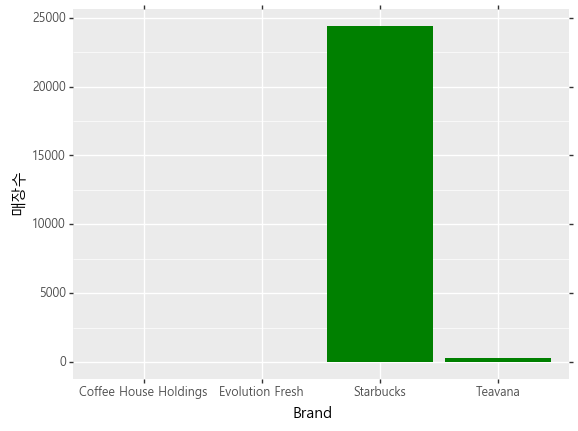

<ggplot: (142013005246)>

In [36]:
(ggplot(brand)
 +aes(x='Brand', y='매장수')
 +geom_bar(stat='identity', position='dodge', fill='green')
 +theme(text=element_text(family='Malgun Gothic'))
)

# Ownership Type에 따라 얼마나 분포되어 있는지 확인

In [37]:
sb_df.head()

,Brand,Ownership Type,Street Address,City,Timezone,Longitude,Latitude
0,Starbucks,Licensed,"Av. Meritxell, 96",Andorra la Vella,Europe/Andorra,1.53,42.51
1,Starbucks,Licensed,"1 Street 69, Al Jarf",Ajman,Asia/Dubai,55.47,25.42
2,Starbucks,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,Asia/Dubai,55.47,25.39
3,Starbucks,Licensed,Al Salam Street,Abu Dhabi,Asia/Dubai,54.38,24.48
4,Starbucks,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,Asia/Dubai,54.54,24.51


In [38]:
# Ownership Type 종류 확인하기
sb_df['Ownership Type'].value_counts()

Company Owned    11718
Licensed          8800
Joint Venture     3885
Franchise          317
Name: Ownership Type, dtype: int64

In [44]:
# 새로운 데이터프레임 만들기
ownership = pd.DataFrame(sb_df.groupby(['Ownership Type'])['Ownership Type'].count())
ownership.columns = ['매장수']
ownership = ownership.reset_index()
ownership

,Ownership Type,매장수
0,Company Owned,11718
1,Franchise,317
2,Joint Venture,3885
3,Licensed,8800


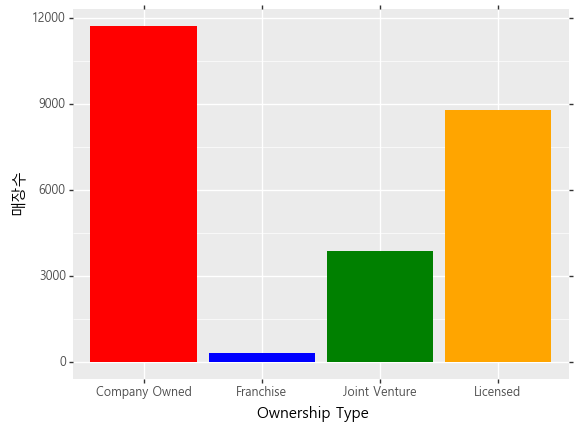

<ggplot: (-9223371894840532999)>

In [46]:
(ggplot(ownership)
 +aes(x='Ownership Type', y='매장수')
 +geom_bar(stat='identity', position='dodge',fill=('red','blue','green','orange'))
 +theme(text=element_text(family='Malgun Gothic'))
)